<a href="https://colab.research.google.com/github/ozakbas/CS412-Machine-Learning/blob/main/Practices/K_Nearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load MNIST dataset

MNIST is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images

Load the dataset from keras. Keras returns train and test tuples of features and labels.

In [15]:
from keras.datasets import mnist
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import time

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


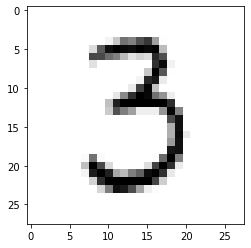

In [16]:
# example image
plt.imshow(x_train[50], cmap='gray_r')

In [17]:
# respresent features as a 1D array
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])

In [18]:
from sklearn.model_selection import train_test_split
# Split 70-30
(train_x, val_x, train_y, val_y) = train_test_split(x_train, y_train, test_size=0.3, random_state=12)

# Train the k-NN classifier

Import KNeighborsClassifier from scikit-learn library.


In [19]:
from sklearn.neighbors import KNeighborsClassifier

# Some of the default values: k=5, metric: Minkowski, Euclidean distance
knn = KNeighborsClassifier()

starting_time = time.time()

#train the model
knn.fit(x_train, y_train)
print("training time: ", time.time()-starting_time)

training time:  31.555437088012695


Use a small porsion of the data to predict since time complexity of kNN prediction is high.

In [20]:
# %10

x_train_sample = train_x[0:round(train_x.shape[0]/10)]
y_train_sample = train_y[0:round(train_x.shape[0]/10)]

val_x_sample = val_x[0:round(val_x.shape[0]/10)]
val_y_sample = val_y[0:round(val_x.shape[0]/10)]

test_x_sample = x_test[0:round(x_test.shape[0]/10),]
test_y_sample = y_test[0:round(x_test.shape[0]/10)]

print('Training data new shape: ', x_train_sample.shape)
print('Val data new shape: ', val_x_sample.shape)
print('Test data new shape: ', test_x_sample.shape)

Training data new shape:  (4200, 784)
Val data new shape:  (1800, 784)
Test data new shape:  (1000, 784)


Tune k value hyperparameter

In [21]:
k = [1,3,5,7,9]
accuracies = []

for k in k:
  
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train_sample, y_train_sample)

  score = knn.score(val_x_sample, val_y_sample)
  accuracies.append(score)

  print("k = {} accuracy = {:.5f}".format(k, score))

k = 1 accuracy = 0.93000
k = 3 accuracy = 0.93667
k = 5 accuracy = 0.93167
k = 7 accuracy = 0.92833
k = 9 accuracy = 0.92944


Train kNN with the best k value

In [30]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_sample, y_train_sample)
predictions = knn.predict(test_x_sample)

In [33]:
# Calculate the accuracy given the true labels and prediction of test data
from sklearn.metrics import accuracy_score
TestAccuracy = accuracy_score(test_y_sample, predictions)
print("Testing Accuracy = %{:.3f}".format(TestAccuracy * 100))

Testing Accuracy = %91.200
